In [239]:
#Importing neccessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [237]:
#Loading the data
df=pd.read_csv("COVID-19-geographic-disbtribution-worldwide.csv")
print("Data downloaded and connected.")

Data downloaded and connected.


In [7]:
#Printing first 5 rows 
df.head()

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
0,03-12-2020,3,12,2020,202,19,Afghanistan,AF,AFG,38041757.0,Asia,7.536455
1,02-12-2020,2,12,2020,400,48,Afghanistan,AF,AFG,38041757.0,Asia,7.005460
2,01-12-2020,1,12,2020,272,11,Afghanistan,AF,AFG,38041757.0,Asia,6.960772
3,30-11-2020,30,11,2020,0,0,Afghanistan,AF,AFG,38041757.0,Asia,6.416633
4,29-11-2020,29,11,2020,228,11,Afghanistan,AF,AFG,38041757.0,Asia,6.845110


In [8]:
#Dimension of the data (rows, columns)
df.shape

(59557, 12)

In [9]:
#Information of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59557 entries, 0 to 59556
Data columns (total 12 columns):
 #   Column                                                      Non-Null Count  Dtype  
---  ------                                                      --------------  -----  
 0   dateRep                                                     59557 non-null  object 
 1   day                                                         59557 non-null  int64  
 2   month                                                       59557 non-null  int64  
 3   year                                                        59557 non-null  int64  
 4   cases                                                       59557 non-null  int64  
 5   deaths                                                      59557 non-null  int64  
 6   countriesAndTerritories                                     59557 non-null  object 
 7   geoId                                                       59293 non-null  object 
 

In [10]:
#Finding the data types of each column
df.dtypes

dateRep                                                        object
day                                                             int64
month                                                           int64
year                                                            int64
cases                                                           int64
deaths                                                          int64
countriesAndTerritories                                        object
geoId                                                          object
countryterritoryCode                                           object
popData2019                                                   float64
continentExp                                                   object
Cumulative_number_for_14_days_of_COVID-19_cases_per_100000    float64
dtype: object

In [11]:
#Printing all column names
df.columns

Index(['dateRep', 'day', 'month', 'year', 'cases', 'deaths',
       'countriesAndTerritories', 'geoId', 'countryterritoryCode',
       'popData2019', 'continentExp',
       'Cumulative_number_for_14_days_of_COVID-19_cases_per_100000'],
      dtype='object')

In [12]:
#Finding null values 
df.isnull().sum()

dateRep                                                          0
day                                                              0
month                                                            0
year                                                             0
cases                                                            0
deaths                                                           0
countriesAndTerritories                                          0
geoId                                                          264
countryterritoryCode                                           112
popData2019                                                    112
continentExp                                                     0
Cumulative_number_for_14_days_of_COVID-19_cases_per_100000    2868
dtype: int64

In [13]:
#Dropping Columns
df.drop(['geoId','countryterritoryCode','day','month','year'],axis=1,inplace=True)

In [14]:
df.describe()

,cases,deaths,popData2019,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
count,59557.000000,59557.000000,5.944500e+04,56689.000000
mean,1082.250936,25.109223,4.117629e+07,61.369118
std,6182.587322,127.874312,1.535990e+08,152.796628
min,-8261.000000,-1918.000000,8.150000e+02,-147.419587
25%,0.000000,0.000000,1.324820e+06,0.692367
50%,15.000000,0.000000,7.813207e+06,6.424439
75%,251.000000,4.000000,2.860872e+07,48.483650
max,207913.000000,4928.000000,1.433784e+09,1900.836210


In [15]:
df[df['cases']<0].head()

,dateRep,cases,deaths,countriesAndTerritories,popData2019,continentExp,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
6080,20-05-2020,-209,0,Benin,11801151.0,Africa,0.288107
10528,10-03-2020,-9,1,Cases_on_an_international_conveyance_Japan,NaN,Other,NaN
16268,07-09-2020,-8261,3800,Ecuador,17373657.0,America,11.598019
16386,12-05-2020,-50,18,Ecuador,17373657.0,America,36.083365
16389,09-05-2020,-1480,50,Ecuador,17373657.0,America,101.504249


In [16]:
df[df['deaths']<0].head()

,dateRep,cases,deaths,countriesAndTerritories,popData2019,continentExp,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
14541,06-07-2020,75,-3,Czechia,10649800.0,Europe,18.939323
14542,05-07-2020,121,-1,Czechia,10649800.0,Europe,18.704577
27151,03-10-2020,466,-5,Ireland,4904240.0,Europe,97.711368
28182,25-06-2020,577,-31,Italy,60359546.0,Europe,6.042126
30138,06-08-2020,218,-12,Kosovo,1798506.0,Europe,178.259066


In [17]:
#convert all numbers in cases, deaths, cumulative_number to positives
df['cases'] = df['cases'] .abs()
df['deaths'] = df['deaths'].abs()
df['Cumulative_number_for_14_days_of_COVID-19_cases_per_100000'] = df['Cumulative_number_for_14_days_of_COVID-19_cases_per_100000'].abs()

In [14]:
df.dropna()

,dateRep,cases,deaths,countriesAndTerritories,popData2019,continentExp,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
0,2020-11-18,383,13,Afghanistan,38041757.0,Asia,5.354642
1,2020-11-17,65,6,Afghanistan,38041757.0,Asia,4.573921
2,2020-11-16,163,9,Afghanistan,38041757.0,Asia,4.652782
3,2020-11-15,205,12,Afghanistan,38041757.0,Asia,4.571293
4,2020-11-14,66,10,Afghanistan,38041757.0,Asia,4.232191
...,...,...,...,...,...,...,...
56343,2020-04-07,0,0,Zimbabwe,14645473.0,Africa,0.047796
56344,2020-04-06,0,0,Zimbabwe,14645473.0,Africa,0.047796
56345,2020-04-05,0,0,Zimbabwe,14645473.0,Africa,0.047796
56346,2020-04-04,1,0,Zimbabwe,14645473.0,Africa,0.054624


In [15]:
df.describe()

,cases,deaths,popData2019,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
count,56361.000000,56361.000000,5.626400e+04,53513.000000
mean,989.632423,23.850996,4.145903e+07,54.111998
std,5549.230424,124.874851,1.543004e+08,136.950173
min,0.000000,0.000000,8.150000e+02,0.000000
25%,0.000000,0.000000,1.324820e+06,0.624213
50%,13.000000,0.000000,7.813207e+06,6.047152
75%,227.000000,4.000000,2.860872e+07,43.518421
max,184813.000000,4928.000000,1.433784e+09,1900.836210


## As now Data Cleaning is Completed now import new Dataset for Analysis

In [195]:
# Unemployment Dataset https://www.kaggle.com/aniruddhasshirahatti/us-unemployment-dataset-2010-2020

unemployment_data = pd.read_csv("unemployment_data_us.csv")

In [196]:
unemployment_data.head()

,Year,Month,Primary_School,Date,High_School,Associates_Degree,Professional_Degree,White,Black,Asian,Hispanic,Men,Women
0,2010,Jan,15.3,Jan-2010,10.2,8.6,4.9,8.8,16.5,8.3,12.9,10.2,7.9
1,2011,Jan,14.3,Jan-2011,9.5,8.1,4.3,8.1,15.8,6.8,12.3,9.0,7.9
2,2012,Jan,13.0,Jan-2012,8.5,7.1,4.3,7.4,13.6,6.7,10.7,7.7,7.6
3,2013,Jan,12.0,Jan-2013,8.1,6.9,3.8,7.1,13.7,6.4,9.7,7.5,7.2
4,2014,Jan,9.4,Jan-2014,6.5,5.9,3.3,5.7,12.1,4.7,8.3,6.2,5.8


In [197]:
unemployment_data = unemployment_data.dropna()

In [198]:
unemployment_data.isnull().sum()

Year                   0
Month                  0
Primary_School         0
Date                   0
High_School            0
Associates_Degree      0
Professional_Degree    0
White                  0
Black                  0
Asian                  0
Hispanic               0
Men                    0
Women                  0
dtype: int64

In [199]:
unemployment_data

,Year,Month,Primary_School,Date,High_School,Associates_Degree,Professional_Degree,White,Black,Asian,Hispanic,Men,Women
0,2010,Jan,15.3,Jan-2010,10.2,8.6,4.9,8.8,16.5,8.3,12.9,10.2,7.9
1,2011,Jan,14.3,Jan-2011,9.5,8.1,4.3,8.1,15.8,6.8,12.3,9.0,7.9
2,2012,Jan,13.0,Jan-2012,8.5,7.1,4.3,7.4,13.6,6.7,10.7,7.7,7.6
3,2013,Jan,12.0,Jan-2013,8.1,6.9,3.8,7.1,13.7,6.4,9.7,7.5,7.2
4,2014,Jan,9.4,Jan-2014,6.5,5.9,3.3,5.7,12.1,4.7,8.3,6.2,5.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...
126,2015,Dec,6.4,Dec-2015,5.6,4.1,2.5,4.4,8.5,4.1,6.2,4.6,4.5
127,2016,Dec,7.5,Dec-2016,5.1,3.8,2.5,4.2,7.9,2.7,5.9,4.4,4.3
128,2017,Dec,6.2,Dec-2017,4.2,3.6,2.2,3.7,6.7,2.5,5.0,3.7,3.7
129,2018,Dec,5.8,Dec-2018,3.8,3.3,2.2,3.4,6.6,3.3,4.4,3.6,3.5


In [200]:
# Let's Filter the Data and Check the Unemployment Growth in 2019-2020
unemp_19_20 = unemployment_data[ (unemployment_data['Year'] == 2020) | (unemployment_data['Year'] == 2019)  ]

In [211]:
unemp_19_20 = unemp_19_20.dropna()
# As we have now 

date_list = (list(unemp_19_20["Date"]))
date_dict = {"Jan-2019":"1","Feb-2019":"2","Mar-2019":"3","Apr-2019":"4","May-2019":"5","Jun-2019":"6","Jul-2019":"7","Aug-2019":"8","Sep-2019":"9","Oct-2019":"10","Nov-2019":"11","Dec-2019":"12","Jan-2020":"13","Feb-2020":"14","Mar-2020":15}
for i in range(len(date_list)):
    date_list[i] = int(date_dict[date_list[i]])
    
# date_list

In [213]:
date_list

[1, 13, 2, 14, 3, 15, 4, 5, 6, 7, 8, 9, 10, 11, 12]

In [158]:
# unemp_19_20["Date"] = pd.Series(date_list)
 

In [214]:
unemp_19_20["Date_sorted"] = date_list

In [215]:
# As i have add new Date list in sorted form which help us to plot the Correct plot
unemp_19_20.sort_values(by=['Date_sorted'])


,Year,Month,Primary_School,Date,High_School,Associates_Degree,Professional_Degree,White,Black,Asian,Hispanic,Men,Women,Date_sorted
9,2019,Jan,5.7,Jan-2019,3.7,3.4,2.4,3.5,6.8,3.1,4.8,3.7,3.6,1
20,2019,Feb,5.3,Feb-2019,3.7,3.1,2.2,3.3,6.9,3.1,4.3,3.5,3.4,2
31,2019,Mar,5.8,Mar-2019,3.7,3.4,2.0,3.4,6.6,3.1,4.7,3.6,3.3,3
42,2019,Apr,5.3,Apr-2019,3.4,3.1,2.1,3.1,6.6,2.2,4.2,3.4,3.1,4
53,2019,May,5.4,May-2019,3.6,2.8,2.1,3.3,6.2,2.5,4.2,3.4,3.3,5
64,2019,Jun,5.3,Jun-2019,3.9,3.0,2.1,3.3,6.0,2.1,4.3,3.3,3.3,6
75,2019,Jul,5.2,Jul-2019,3.6,3.2,2.1,3.3,5.9,2.8,4.5,3.3,3.3,7
86,2019,Aug,5.4,Aug-2019,3.6,3.0,2.1,3.4,5.4,2.8,4.2,3.3,3.3,8
97,2019,Sep,4.8,Sep-2019,3.6,2.9,2.0,3.2,5.5,2.5,3.9,3.2,3.1,9
108,2019,Oct,5.5,Oct-2019,3.7,2.8,2.1,3.2,5.5,2.8,4.1,3.2,3.2,10


In [216]:
unemp_19_20.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15 entries, 9 to 130
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Year                 15 non-null     int64  
 1   Month                15 non-null     object 
 2   Primary_School       15 non-null     float64
 3   Date                 15 non-null     object 
 4   High_School          15 non-null     float64
 5   Associates_Degree    15 non-null     float64
 6   Professional_Degree  15 non-null     float64
 7   White                15 non-null     float64
 8   Black                15 non-null     float64
 9   Asian                15 non-null     float64
 10  Hispanic             15 non-null     float64
 11  Men                  15 non-null     float64
 12  Women                15 non-null     float64
 13  Date_sorted          15 non-null     int64  
dtypes: float64(10), int64(2), object(2)
memory usage: 1.8+ KB


Text(0, 0.5, 'Unemployment Associates_Degree')

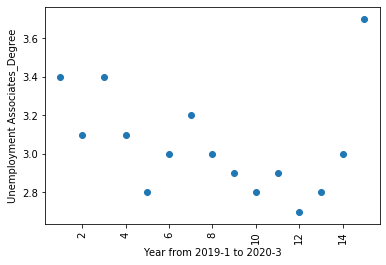

In [232]:
# Gaph which is showing Unemployment in Associates Degree from 2019 - 2020 March
plt.scatter(unemp_19_20.Date_sorted,unemp_19_20.Associates_Degree)
plt.xticks(rotation=90)
plt.xlabel("Year from 2019-1 to 2020-3")
plt.ylabel("Unemployment Associates_Degree")

Text(0, 0.5, 'Unemployment Professional_Degree')

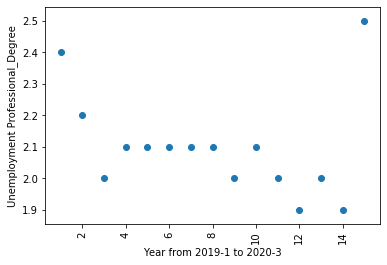

In [223]:
# Gaph which is showing Unemployment in Professional Degree from 2019 - 2020 March
plt.scatter(unemp_19_20.Date_sorted,unemp_19_20.Professional_Degree)
plt.xticks(rotation=90)
plt.xlabel("Year from 2019-1 to 2020-3")
plt.ylabel("Unemployment Professional_Degree")

Text(0, 0.5, 'Unemployment High_School')

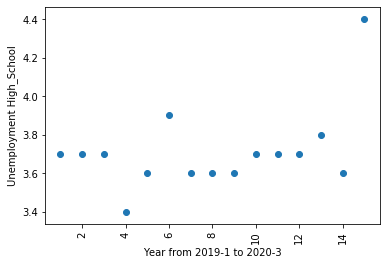

In [224]:
# Gaph which is showing Unemployment in School Degree from 2019 - 2020 March
plt.scatter(unemp_19_20.Date_sorted,unemp_19_20.High_School)
plt.xticks(rotation=90)
plt.xlabel("Year from 2019-1 to 2020-3")
plt.ylabel("Unemployment High_School")

In [227]:
# Lets verify for 3 month data of 2020 year

unemp_20 = unemp_19_20[unemp_19_20["Year"]==2020]
unemp_20

,Year,Month,Primary_School,Date,High_School,Associates_Degree,Professional_Degree,White,Black,Asian,Hispanic,Men,Women,Date_sorted
10,2020,Jan,5.5,Jan-2020,3.8,2.8,2.0,3.1,6.0,3.0,4.3,3.3,3.2,13
21,2020,Feb,5.7,Feb-2020,3.6,3.0,1.9,3.1,5.8,2.5,4.4,3.3,3.1,14
32,2020,Mar,6.8,Mar-2020,4.4,3.7,2.5,4.0,6.7,4.1,6.0,4.0,4.0,15


Text(0, 0.5, 'Unemployment Professional_Degree')

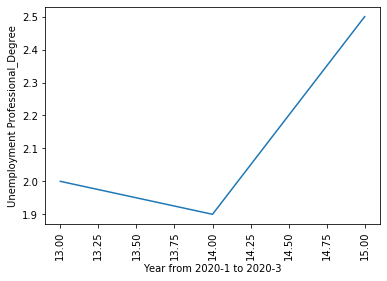

In [229]:
# Gaph which is showing Unemployment in Professional Degree from  2020 
plt.plot(unemp_20.Date_sorted,unemp_20.Professional_Degree)
plt.xticks(rotation=90)
plt.xlabel("Year from 2020-1 to 2020-3")
plt.ylabel("Unemployment Professional_Degree")

Text(0, 0.5, 'Unemployment High_School')

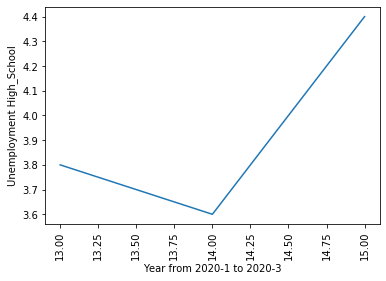

In [230]:
# Gaph which is showing Unemployment in High school Degree from  2020 
plt.plot(unemp_20.Date_sorted,unemp_20.High_School)
plt.xticks(rotation=90)
plt.xlabel("Year from 2020-1 to 2020-3")
plt.ylabel("Unemployment High_School")

Text(0, 0.5, 'Unemployment Associates_Degree')

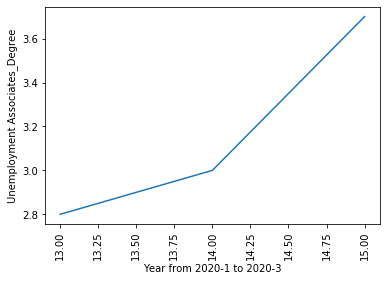

In [231]:
# Gaph which is showing Unemployment in Associaltes Degree from  2020 
plt.plot(unemp_20.Date_sorted,unemp_20.Associates_Degree)
plt.xticks(rotation=90)
plt.xlabel("Year from 2020-1 to 2020-3")
plt.ylabel("Unemployment Associates_Degree")

In [16]:
#Created a function which extracts info from the date
def date_function(df):
  df['day'] = df['dateRep'].dt.day
  df['month'] = df['dateRep'].dt.month 
  df['year'] = getattr(df['dateRep'].dt, "year").astype(int) 
  df['weekday'] = df['dateRep'].dt.dayofweek
  df['quarter'] = df['dateRep'].dt.quarter
  return df

In [17]:
df=date_function(df)
df.head()

,dateRep,cases,deaths,countriesAndTerritories,popData2019,continentExp,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000,day,month,year,weekday,quarter
0,2020-11-18,383,13,Afghanistan,38041757.0,Asia,5.354642,18,11,2020,2,4
1,2020-11-17,65,6,Afghanistan,38041757.0,Asia,4.573921,17,11,2020,1,4
2,2020-11-16,163,9,Afghanistan,38041757.0,Asia,4.652782,16,11,2020,0,4
3,2020-11-15,205,12,Afghanistan,38041757.0,Asia,4.571293,15,11,2020,6,4
4,2020-11-14,66,10,Afghanistan,38041757.0,Asia,4.232191,14,11,2020,5,4


In [18]:
#Date on which first covid case was filed
df['dateRep'].min()

Timestamp('2019-12-31 00:00:00')

In [19]:
#Latest Date of the data
df['dateRep'].max()

Timestamp('2020-11-18 00:00:00')

In [20]:
#Time Period
df['dateRep'].max() - df['dateRep'].min()

Timedelta('323 days 00:00:00')

In [21]:
#Adding columns:cases_cum is nothing but total cases and deaths_cum is total deaths
df['cases_cum'] = df.sort_values('dateRep').groupby(['countriesAndTerritories'])['cases'].cumsum()
df['deaths_cum'] = df.sort_values('dateRep').groupby(['countriesAndTerritories'])['deaths'].cumsum()
df['Fatality'] = df['deaths_cum'] / df['cases_cum']

In [22]:
df.head()

,dateRep,cases,deaths,countriesAndTerritories,popData2019,continentExp,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000,day,month,year,weekday,quarter,cases_cum,deaths_cum,Fatality
0,2020-11-18,383,13,Afghanistan,38041757.0,Asia,5.354642,18,11,2020,2,4,43851,1645,0.037513
1,2020-11-17,65,6,Afghanistan,38041757.0,Asia,4.573921,17,11,2020,1,4,43468,1632,0.037545
2,2020-11-16,163,9,Afghanistan,38041757.0,Asia,4.652782,16,11,2020,0,4,43403,1626,0.037463
3,2020-11-15,205,12,Afghanistan,38041757.0,Asia,4.571293,15,11,2020,6,4,43240,1617,0.037396
4,2020-11-14,66,10,Afghanistan,38041757.0,Asia,4.232191,14,11,2020,5,4,43035,1605,0.037295


In [23]:
#Renaming some column names for ease
df.rename({"countriesAndTerritories":"countries"},axis=1,inplace=True)
df.rename({"continentExp":"continent"},axis=1,inplace=True)

In [24]:
#Total Cases in the world
df['cases'].sum()

55776673

In [25]:
#Max no. of cases on a single day
df[df['cases']==max(df['cases'])]

,dateRep,cases,deaths,countries,popData2019,continent,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000,day,month,year,weekday,quarter,cases_cum,deaths_cum,Fatality
53778,2020-11-14,184813,1915,United_States_of_America,329064917.0,America,514.241085,14,11,2020,5,4,10739614,244345,0.022752


In [26]:
#Total Deaths in the world
df['deaths'].sum()

1344266

In [27]:
#Max no. of deaths on a single day
df[df['deaths']==max(df['deaths'])]

,dateRep,cases,deaths,countries,popData2019,continent,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000,day,month,year,weekday,quarter,cases_cum,deaths_cum,Fatality
53990,2020-04-16,30148,4928,United_States_of_America,329064917.0,America,128.528743,16,4,2020,3,2,639664,30985,0.048439


In [28]:
#Total number of Countries and Territories 
df['countries'].nunique()

214

In [29]:
#Total number of Continent
df['continent'].nunique()

6

In [30]:
#We can say that majority of data is coming from Europe Africa America Asia 
df['continent'].value_counts()

Europe     15692
Africa     13550
America    12468
Asia       12399
Oceania     2188
Other         64
Name: continent, dtype: int64

In [31]:
#Finding the top countries with max cases
CountryWiseC=df.groupby(['countries']).sum().sort_values(['cases'], ascending = False)
CountryWiseC

,cases,deaths,popData2019,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000,day,month,year,weekday,quarter,cases_cum,deaths_cum,Fatality
countries,,,,,,,,,,,,
United_States_of_America,11359802,248687,1.066170e+11,44136.800825,5008,1892,654479,969,749,1031536794,33476084,9.973966
India,8912907,130993,4.413529e+11,8866.990675,4999,1889,652459,969,748,656435448,10951478,5.799955
Brazil,5911758,166699,6.838004e+10,38074.283410,5008,1892,654479,969,749,592865975,19155766,10.063399
France,2038287,46273,2.171217e+10,38247.681420,5008,1892,654479,969,749,94999276,6792470,31.914485
Russia,1991998,34387,4.726261e+10,17583.419219,5008,1892,654479,969,749,183195828,2998199,3.355550
...,...,...,...,...,...,...,...,...,...,...,...,...
Montserrat,13,1,1.207822e+06,2825.085153,3835,1727,488840,726,663,2773,207,17.082168
Marshall_Islands,4,0,1.234611e+06,6.803762,261,228,42420,63,84,24,0,0.000000
Anguilla,3,0,3.524664e+06,67.240452,3695,1713,478740,711,659,704,0,0.000000


In [32]:
cases_per_country = df.groupby(["countries"])["cases"].sum().reset_index()

C:\Users\shali\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


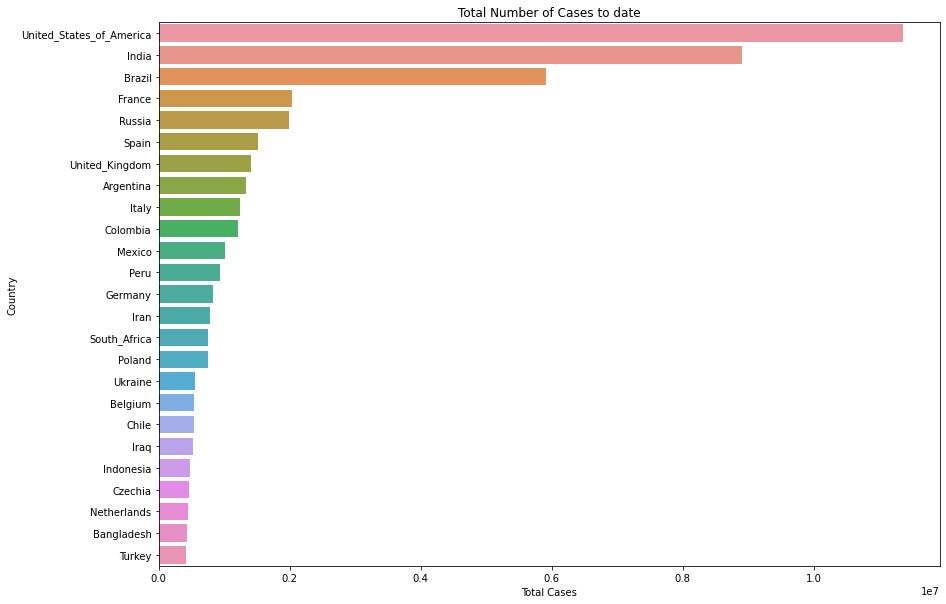

In [33]:
#Finding top 25 countries
top_cases = cases_per_country.sort_values(by=["cases"], ascending=False).head(25)
# Generate a Barplot
plt.figure(figsize=(14,10))
plot = sns.barplot(top_cases["cases"], top_cases["countries"])
plt.title("Total Number of Cases to date")
plt.xlabel("Total Cases")
plt.ylabel("Country")
plt.show()

In [34]:
CountryWiseD=df.groupby(['countries']).sum().sort_values(['deaths'], ascending = False)
CountryWiseD

,cases,deaths,popData2019,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000,day,month,year,weekday,quarter,cases_cum,deaths_cum,Fatality
countries,,,,,,,,,,,,
United_States_of_America,11359802,248687,1.066170e+11,44136.800825,5008,1892,654479,969,749,1031536794,33476084,9.973966
Brazil,5911758,166699,6.838004e+10,38074.283410,5008,1892,654479,969,749,592865975,19155766,10.063399
India,8912907,130993,4.413529e+11,8866.990675,4999,1889,652459,969,748,656435448,10951478,5.799955
Mexico,1011153,99026,4.133447e+10,10765.985536,5008,1892,654479,969,749,102459409,10078089,20.382054
United_Kingdom,1410732,52745,2.159366e+10,26345.980303,5008,1892,654479,969,749,91580070,8678046,28.170456
...,...,...,...,...,...,...,...,...,...,...,...,...
Saint_Vincent_and_the_Grenadines,83,0,2.654232e+07,952.139828,3759,1722,484800,720,662,10062,0,0.000000
Bhutan,378,0,1.907735e+08,669.249136,3944,1752,505000,752,672,33465,0,0.000000
Seychelles,160,0,2.433751e+07,2188.436787,3941,1749,502980,744,671,19358,0,0.000000


In [35]:
deaths_per_country = df.groupby(["countries"])["deaths"].sum().reset_index()

C:\Users\shali\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


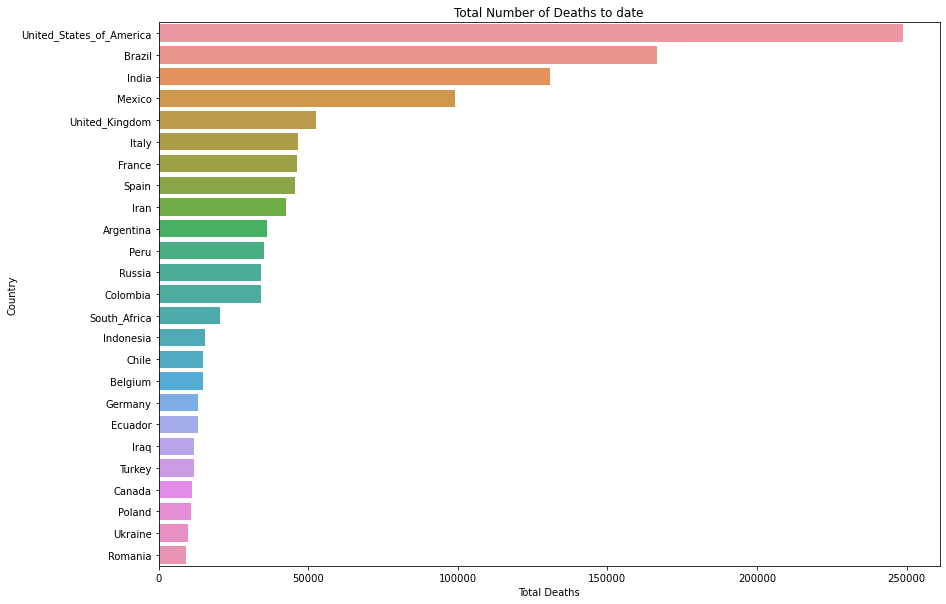

In [36]:
#Finding top 25 countries
top_deaths = deaths_per_country.sort_values(by=["deaths"], ascending=False).head(25)
# Generate a Barplot
plt.figure(figsize=(14,10))
plot = sns.barplot(top_deaths["deaths"], top_deaths["countries"])

plt.title("Total Number of Deaths to date")
plt.xlabel("Total Deaths")
plt.ylabel("Country")
plt.show()

In [37]:
df.sort_values('continent').groupby(['continent'])['cases'].sum()

continent
Africa      2000213
America    23943268
Asia       15025784
Europe     14758139
Oceania       48555
Other           714
Name: cases, dtype: int64

In [38]:
#Making labels for following Graphs
conti=list(df['continent'].unique())
conti.sort()

Text(0.5, 1.0, 'ContinentWise Cases')

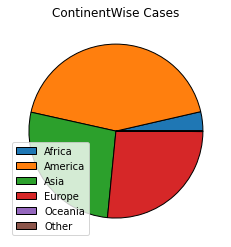

In [39]:
#Pie Chart
plt.pie(df.groupby(['continent'])['cases'].sum(), wedgeprops={'edgecolor':'black'})
plt.legend(conti)
plt.title("ContinentWise Cases")

Text(0.5, 1.0, 'ContinentWise Cases')

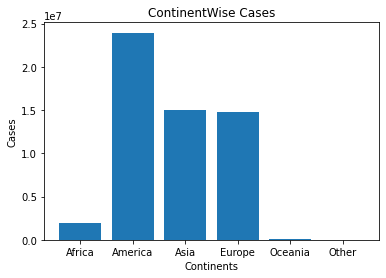

In [40]:
plt.bar(conti,df.sort_values('continent').groupby(['continent'])['cases'].sum())
plt.xlabel("Continents")
plt.ylabel("Cases")
plt.title("ContinentWise Cases")

In [41]:
df.sort_values('continent').groupby(['continent'])['deaths'].sum()

continent
Africa      48029
America    687678
Asia       267087
Europe     340366
Oceania      1099
Other           7
Name: deaths, dtype: int64

Text(0.5, 1.0, 'ContinentWise deaths')

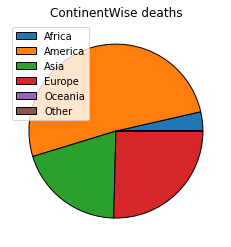

In [42]:
#Pie Chart
plt.pie(df.groupby(['continent'])['deaths'].sum(), wedgeprops={'edgecolor':'black'})
plt.legend(conti)
plt.title("ContinentWise deaths")

Text(0.5, 1.0, 'ContinentWise Deaths')

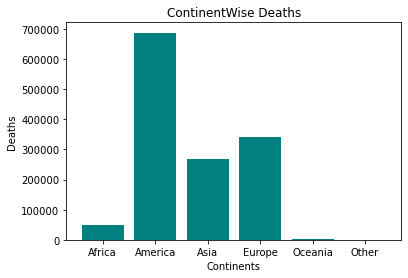

In [43]:
plt.bar(conti,df.sort_values('continent').groupby(['continent'])['deaths'].sum(),color='teal')
plt.xlabel("Continents")
plt.ylabel("Deaths")
plt.title("ContinentWise Deaths")

In [44]:
#Finding details month wise
df.groupby(['month']).sum()

,cases,deaths,popData2019,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000,day,year,weekday,quarter,cases_cum,deaths_cum,Fatality
month,,,,,,,,,,,
1,9799,213,1.798195e+11,4.736005,33232,4195540,6231,2077,38431,883,0.501312
2,75414,2708,1.682183e+11,150.022873,29145,3924860,5963,1943,1631527,45092,15.688603
3,723327,35796,2.003990e+11,38147.425072,76555,7783060,11386,3853,8443826,352985,72.395271
4,2340836,189179,2.293312e+11,167966.994486,95353,12372500,18164,12250,60525361,4071784,229.279509
5,2902078,143979,2.377151e+11,138408.832348,103558,13057280,20645,12928,141301610,9439413,254.093506
6,4251058,134131,2.300480e+11,179224.398750,97167,12663380,17762,12538,242221740,13190302,215.368567
7,7068160,166203,2.377457e+11,248818.274945,103664,13087580,19437,19437,425618871,18210947,203.808654
8,7966841,179532,2.377457e+11,343346.841494,103664,13087580,19855,19437,665597115,23760042,182.963163
9,8472220,162171,2.300765e+11,400603.980209,97185,12665400,18183,18810,889144757,28119019,161.018052


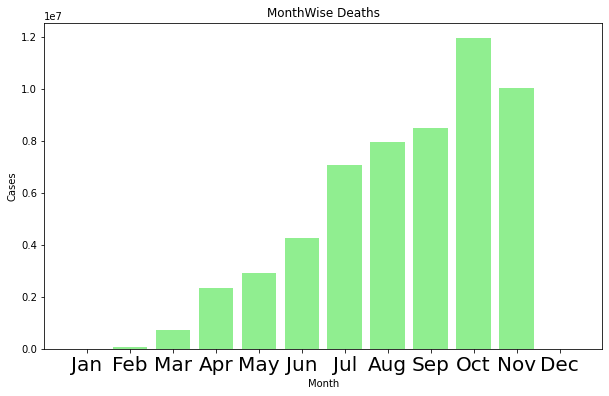

In [45]:
labels = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
plt.figure(figsize=(10,6))
plt.bar(labels,df.groupby(['month'])['cases'].sum(),color='lightgreen')
plt.xlabel("Month")
plt.ylabel("Cases")
plt.title("MonthWise Deaths")
plt.xticks( labels,fontsize=20)
plt.show()

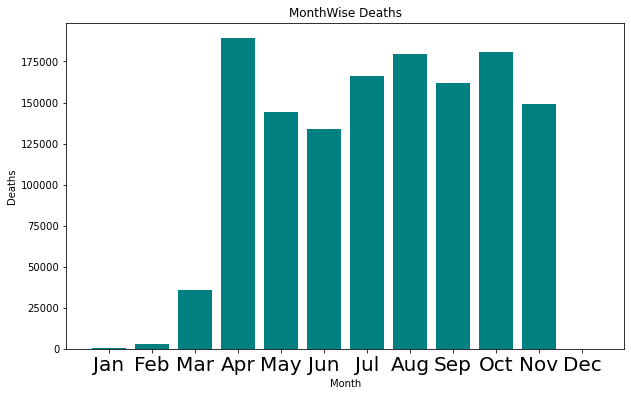

In [46]:
labels = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
plt.figure(figsize=(10,6))
plt.bar(labels,df.groupby(['month'])['deaths'].sum(),color='teal')
plt.xlabel("Month")
plt.ylabel("Deaths")
plt.title("MonthWise Deaths")
plt.xticks(labels,fontsize=20)
plt.show()

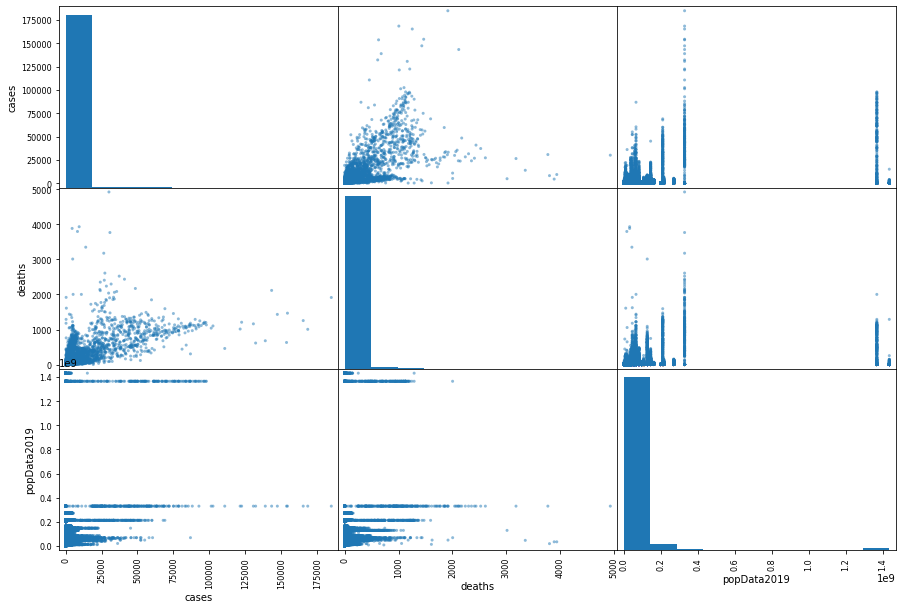

In [47]:
from pandas.plotting import scatter_matrix
attributes = [ "cases", "deaths", "popData2019" ]
scatter_matrix(df[attributes], figsize=(15,10));

Text(0, 0.5, 'No. of Cases')

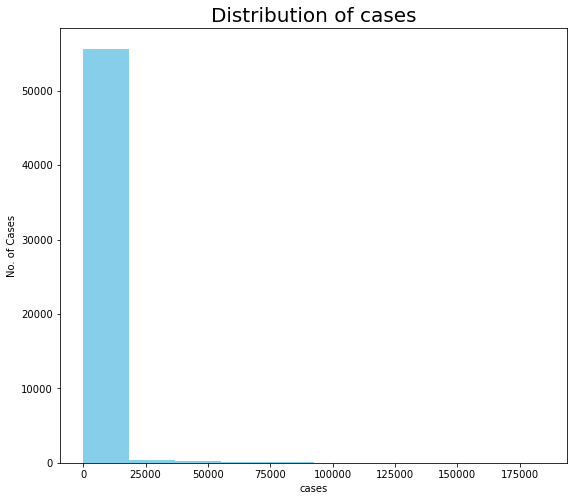

In [48]:
#Skewness of Cases in df
plt.figure(figsize = (20,8))
plt.subplot(121)
plt.hist(df['cases'],color = "skyblue");

plt.title('Distribution of cases',fontsize=20);
plt.xlabel('cases')
plt.ylabel("No. of Cases")



Text(0, 0.5, 'No. of deaths')

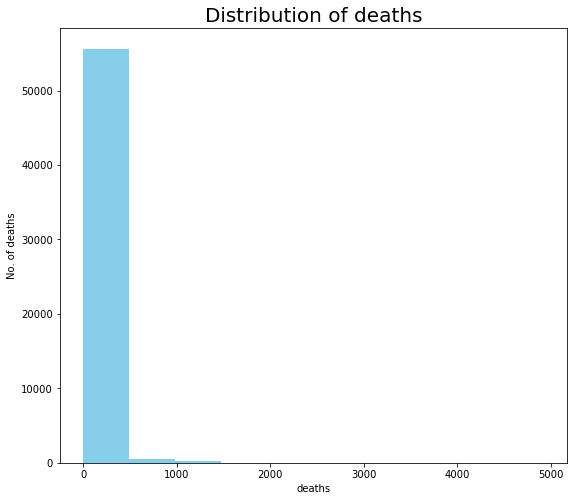

In [49]:
#Skewness of Deaths in df
plt.figure(figsize = (20,8))
plt.subplot(121)
plt.hist(df['deaths'],color = "skyblue");

plt.title('Distribution of deaths',fontsize=20);
plt.xlabel('deaths')
plt.ylabel("No. of deaths")

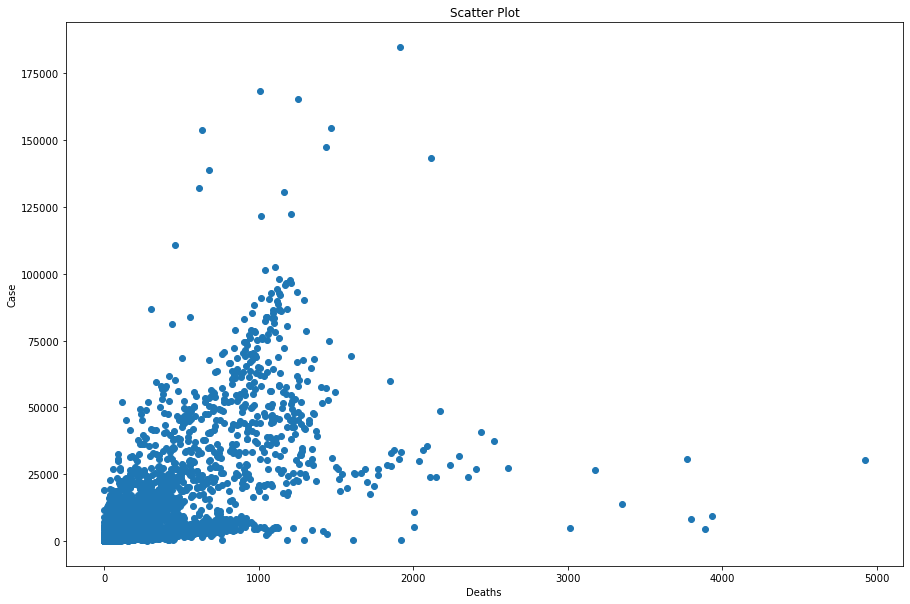

In [50]:
#Plotting scatter plot of case vs death
from matplotlib.pyplot import figure
figure(figsize=(15,10))
plt.scatter(df['deaths'],df['cases'])
plt.title("Scatter Plot")
plt.xlabel("Deaths ")
plt.ylabel("Case");

## Linear Regression for Further Analysis

In [247]:
data = pd.read_csv("COVID-19-geographic-disbtribution-worldwide.csv")
# data['Cases'] = data['cases'].str.replace(',', '')
# data['Tests'] = data['Tests'].str.replace(',', '')
data['Cases'] = pd.to_numeric(data['cases'])     
data['Death'] = pd.to_numeric(data['deaths'])
data

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000,Cases,Death
0,03-12-2020,3,12,2020,202,19,Afghanistan,AF,AFG,38041757.0,Asia,7.536455,202,19
1,02-12-2020,2,12,2020,400,48,Afghanistan,AF,AFG,38041757.0,Asia,7.005460,400,48
2,01-12-2020,1,12,2020,272,11,Afghanistan,AF,AFG,38041757.0,Asia,6.960772,272,11
3,30-11-2020,30,11,2020,0,0,Afghanistan,AF,AFG,38041757.0,Asia,6.416633,0,0
4,29-11-2020,29,11,2020,228,11,Afghanistan,AF,AFG,38041757.0,Asia,6.845110,228,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59552,25-03-2020,25,3,2020,0,0,Zimbabwe,ZW,ZWE,14645473.0,Africa,NaN,0,0
59553,24-03-2020,24,3,2020,0,1,Zimbabwe,ZW,ZWE,14645473.0,Africa,NaN,0,1
59554,23-03-2020,23,3,2020,0,0,Zimbabwe,ZW,ZWE,14645473.0,Africa,NaN,0,0
59555,22-03-2020,22,3,2020,1,0,Zimbabwe,ZW,ZWE,14645473.0,Africa,NaN,1,0


Scale the data

In [248]:
X = data['Death'].values.reshape(-1,1)
y = data['Cases'].values.reshape(-1,1)

The linear model is: Y = 198.26 + 35.206X


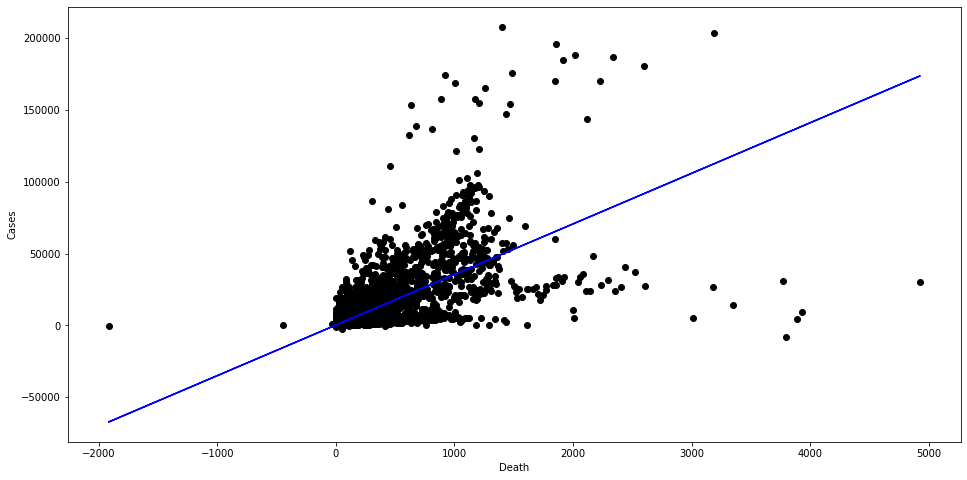

In [250]:
reg = LinearRegression()
reg.fit(X, y)
predictions = reg.predict(X)
print("The linear model is: Y = {:.5} + {:.5}X".format(reg.intercept_[0], reg.coef_[0][0]))
plt.figure(figsize=(16, 8))
plt.scatter(
    X,
    y,
    c='black'
)
plt.plot(
    X,
    predictions,
    c='blue',
#     linewidth=2
)
plt.xlabel("Death")
plt.ylabel("Cases")
plt.show()

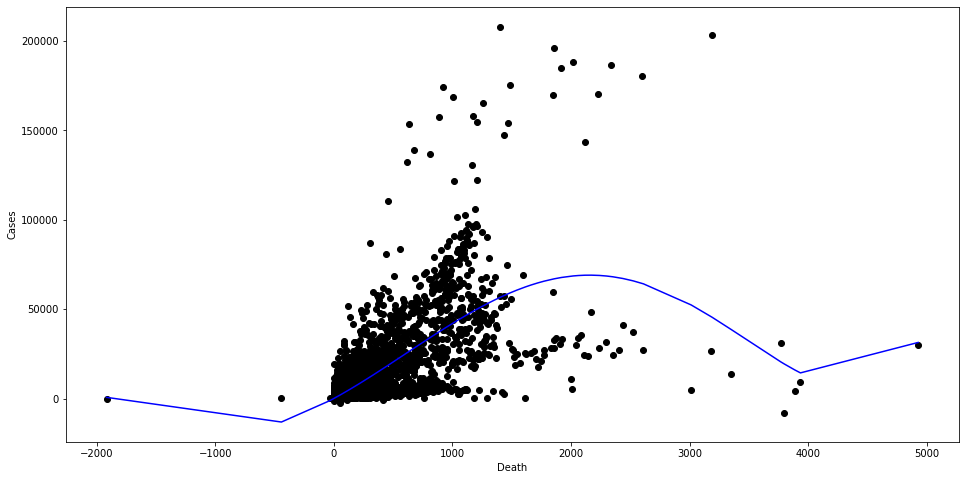

In [254]:
## Polynomial Regression
poly = PolynomialFeatures(degree =5) 
X_poly = poly.fit_transform(X) 
  
poly.fit(X_poly, y) 
lin2 = LinearRegression() 
lin2.fit(X_poly, y) 
pred = lin2.predict(X_poly)
new_X, new_y = zip(*sorted(zip(X, pred)))
plt.figure(figsize=(16, 8))
plt.scatter(
    X,
    y,
    c='black'
)
plt.plot(
    new_X, new_y,
    c='blue'
)
plt.xlabel("Death")
plt.ylabel("Cases")
plt.show()